In [1]:
import quandl
import plotly.express as px
import matplotlib.pyplot as plt
import pandas_datareader as web
from datetime import datetime



Bad key "text.kerning_factor" on line 4 in
C:\Users\victo\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
quandl.ApiConfig.api_key = "LzPif8exqBstehSaxNMp"
df = quandl.get("MULTPL/SP500_PE_RATIO_MONTH")

In [3]:
df = df[df.index>='1999-01-01']

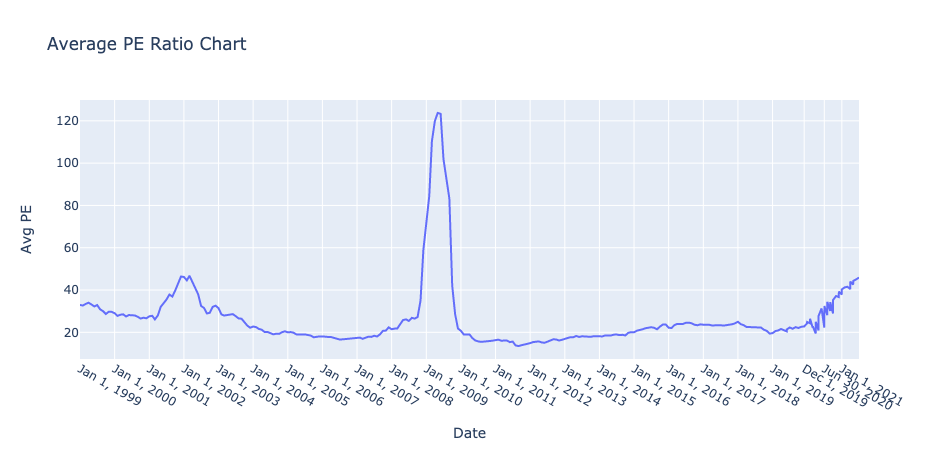

In [4]:
fig = px.line(df, x=df.index, y="Value" ,  labels={"Value": "Avg PE"} , title='Average PE Ratio Chart')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df.index[::12]
    ))
fig.show()

In [5]:
# Are we in a bubble considering traditional measures?

# Well, there are many metrics we could look at to try to determine this, we have plotted an average PE ratio of the biggest 500 companies in the US, and here is what
# we found out, 

# price per earnings are hovering around 45, thats means and investor would take an average of 45 years to get a return on his investment, of course we are not considering things 
# such as growth of sales and gros of profits or increase margins and net income.

# That said, this puts us in a territory seen in the 2000 dot com bubble before it busted. but not nearly close to levels in the 2008 bubble of aproximatelly 128.

# To simply put it in perpective, either investors are ok with getting verry little returns and yield on their money or the sentiment of growth overall on the biggest US complies are very bullish.

# This metric doesnt say it all tho, stocks can have high multiples suche as PE and still be considerated not in a bubble territory, specially if you compare with Bonds for example that would have usually much higher multiples.




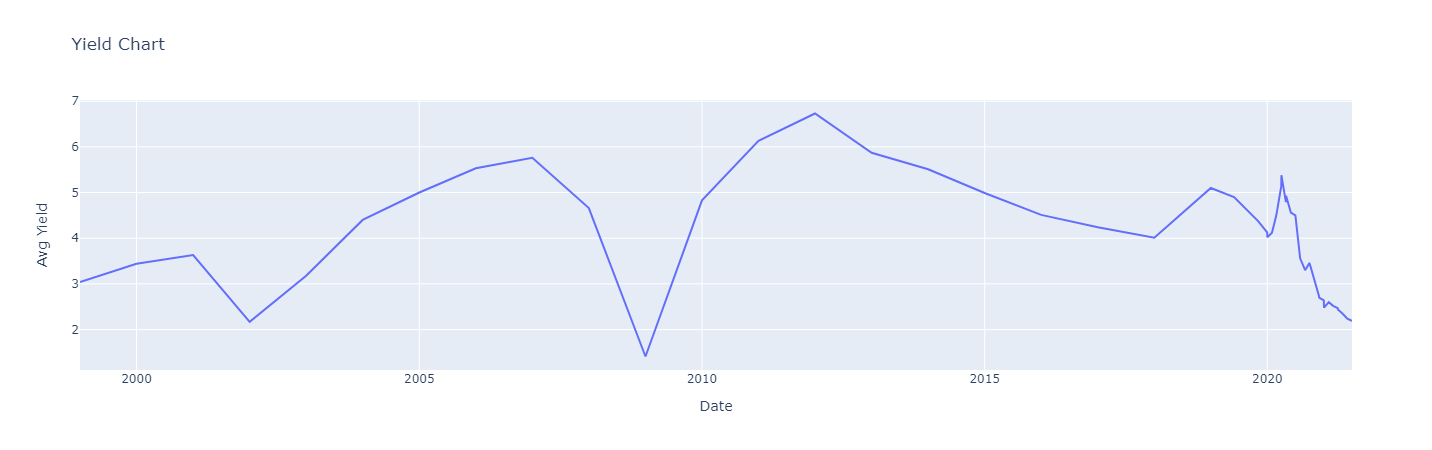

In [6]:
yield_df = quandl.get("MULTPL/SP500_EARNINGS_YIELD_YEAR")
yield_df = yield_df[yield_df.index>='1999-01-01']
fig = px.line(yield_df, x=yield_df.index, y="Value", title='Yield Chart', labels={
                     "Value": "Avg Yield"})
fig.show()

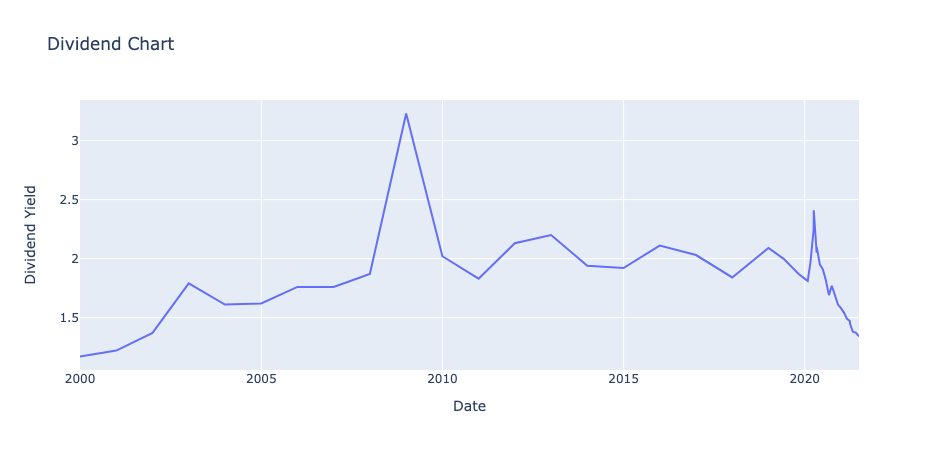

In [7]:
dividend_df = quandl.get("MULTPL/SP500_DIV_YIELD_YEAR")
dividend_df = dividend_df[dividend_df.index>='1999-01-01']
fig = px.line(dividend_df, x=dividend_df.index, y="Value", title='Dividend Chart', labels={
                     "Value": "Dividend Yield"})
fig.show()

In [1]:
# imports all the necessary libraries and packages for the analysis which will be carried out in this assignment
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\ikinf\anaconda3\envs\pyviz\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# In this part of the coding, we will use the US economic indicators to investigate any pattern or relationship between the performance of the stock with these indicators.
# By using the CSV path reader to retrieve the US unemployment rate.csv file for further analysis in this project, and we will set the Date as the index column
unemployment_path = Path("unemployment.csv")
unemployment = pd.read_csv(unemployment_path, infer_datetime_format=True, parse_dates = True, index_col = "DATE")
 


UNRATE
DATE              
1948-01-01     3.4
1948-02-01     3.8
1948-03-01     4.0
1948-04-01     3.9
1948-05-01     3.5

In [35]:
# Data cleaning and drop all the null entries in the dataframe
unemployment.columns = ["unemploy_rate"]
unemployment = unemployment.dropna()
unemployment.head()


unemploy_rate
DATE                     
1948-01-01            3.4
1948-02-01            3.8
1948-03-01            4.0
1948-04-01            3.9
1948-05-01            3.5

In [4]:
# To calculate the percentage change of the unemployment rate using pct_change() function
change_in_unemployment = unemployment.pct_change().dropna().copy()
change_in_unemployment.head()

unemploy_rate
DATE                     
1948-02-01       0.117647
1948-03-01       0.052632
1948-04-01      -0.025000
1948-05-01      -0.102564
1948-06-01       0.028571

In [5]:
# By using the CSV path reader to retrieve the US money supply (m1).csv file for our analysis in this project, and we will set the Date as the index column

msupply_path = Path("m1supply.csv")
msupply = pd.read_csv(msupply_path, infer_datetime_format=True, parse_dates = True, index_col="DATE")
msupply.tail(10)

WM1NS
DATE               
2021-03-29  18949.6
2021-04-05  19169.2
2021-04-12  19113.1
2021-04-19  19128.8
2021-04-26  18985.6
2021-05-03  19111.5
2021-05-10  19198.8
2021-05-17  19265.8
2021-05-24  19096.9
2021-05-31  19154.4

In [6]:
# Data cleaning and drop all the null entries in the dataframe and we slice the money supply data to recent 25 years
msupply.columns =["m1supply"]
msupply= msupply.dropna()
msupply = msupply['1997-01-01' :'2021-06-30']
msupply.head(10)

m1supply
DATE                
1997-01-06    1126.8
1997-01-13    1096.0
1997-01-20    1081.9
1997-01-27    1064.1
1997-02-03    1076.0
1997-02-10    1069.9
1997-02-17    1065.8
1997-02-24    1060.1
1997-03-03    1071.1
1997-03-10    1068.4

In [36]:
msupply.hvplot(xlabel = "Year", ylabel = "Money Supply M1 in billions", title ="The Money Suppy M1 since 1997", color ="red")

:Curve   [DATE]   (m1supply)

In [ ]:
# By using the panda datareader to retrieve the SP500 index prices from yahoo finance directly and transfer them into dataframe, and we will select the recent 25 years

In [8]:
from pandas_datareader import data as pdr
from datetime import datetime

import yfinance as yf
import requests
# from discord import Webhook, RequestsWebhookAdapter
import time
yf.pdr_override() # <== that's all it takes :-)

SP500_df= pdr.get_data_yahoo(tickers='^GSPC', period='25Y', interval= "1mo", mthreads=True)



[*********************100%***********************]  1 of 1 completed


In [9]:
# Data cleaning and drop all unnecessary columns for our analysis
SP500_df = SP500_df.drop(columns = ["Open","High","Low","Adj Close", "Volume"])

SP500_df.head()

Close
Date                  
1996-08-01  651.989990
1996-09-01  687.330017
1996-10-01  705.270020
1996-11-01  757.020020
1996-12-01  740.739990

In [10]:
# Calculate the monthly return of SP500 using PCT_change() function
SP500_monthly_return = SP500_df.pct_change().dropna().copy()
SP500_monthly_return.columns = ["SP500_monthly_return"]
SP500_monthly_return.head()

SP500_monthly_return
Date                            
1996-09-01              0.054203
1996-10-01              0.026101
1996-11-01              0.073376
1996-12-01             -0.021505
1997-01-01              0.061317

In [ ]:
# By using the panda datareader to retrieve the commodity gold prices from yahoo finance directly and transfer them into dataframe, and we will select the recent 20 years

In [11]:
gld_df= pdr.get_data_yahoo(tickers='GLD', period='20Y', interval= "1mo", mthreads=True)
gld_df = gld_df.drop(columns = ["Open","High","Low","Adj Close", "Volume"])


[*********************100%***********************]  1 of 1 completed


In [12]:
gld_df.head()

Close
Date                 
2004-12-01  43.799999
2005-01-01  42.220001
2005-02-01  43.529999
2005-03-01  42.820000
2005-04-01  43.349998

In [13]:
# Calculate the monthly return of SP500 using PCT_change() function
gld_monthly_return = gld_df.pct_change().dropna().copy()
gld_monthly_return.columns =["gld_monthly_return"]
gld_monthly_return.head()

gld_monthly_return
Date                          
2005-01-01           -0.036073
2005-02-01            0.031028
2005-03-01           -0.016311
2005-04-01            0.012377
2005-05-01           -0.039216

In [14]:
# By using the CSV path reader to retrieve the US interest rate.csv file for our analysis in this project, and we will set the Date as the index column
int_rate_path = Path("3mon_int_rate.csv")
int_rate = pd.read_csv(int_rate_path, infer_datetime_format=True, parse_dates = True, index_col = "DATE")
 
int_rate.tail(20)


TB3MS
DATE             
2019-10-01   1.65
2019-11-01   1.54
2019-12-01   1.54
2020-01-01   1.52
2020-02-01   1.52
2020-03-01   0.29
2020-04-01   0.14
2020-05-01   0.13
2020-06-01   0.16
2020-07-01   0.13
2020-08-01   0.10
2020-09-01   0.11
2020-10-01   0.10
2020-11-01   0.09
2020-12-01   0.09
2021-01-01   0.08
2021-02-01   0.04
2021-03-01   0.03
2021-04-01   0.02
2021-05-01   0.02

In [15]:
# Data cleaning for analysis
int_rate.columns =["int_rate"]
int_rate.head()

int_rate
DATE                
1934-01-01      0.72
1934-02-01      0.62
1934-03-01      0.24
1934-04-01      0.15
1934-05-01      0.16

In [16]:
# By using the CSV path reader to retrieve the US inflation rate.csv file for our analysis in this project, and we will set the Date as the index column
inflation_path = Path("inflation.csv")
inflation = pd.read_csv(inflation_path, infer_datetime_format=True, parse_dates = True, index_col = "DATE")
inflation.columns =["inflation_rate"]

inflation.head()

inflation_rate
DATE                      
1960-01-01       -0.340136
1960-02-01        0.341297
1960-03-01        0.000000
1960-04-01        0.340136
1960-05-01        0.000000

In [ ]:
#Combine all econmic indicators into a matrix by concatenation with column as axis and inner join as the parameters

In [17]:
matrix_df= pd.concat([unemployment, msupply, SP500_monthly_return, gld_monthly_return, int_rate, inflation], axis="columns", join="inner")
matrix_df.head()

unemploy_rate  m1supply  SP500_monthly_return  gld_monthly_return  \
2005-08-01            4.9    1394.4             -0.011222            0.013545   
2006-05-01            4.6    1408.9             -0.030917           -0.013212   
2007-01-01            4.6    1446.7              0.014059            0.025629   
2007-10-01            4.7    1384.3              0.014822            0.069514   
2008-09-01            6.1    1446.9             -0.090791            0.041121   

            int_rate  inflation_rate  
2005-08-01      3.44        0.511771  
2006-05-01      4.72        0.496278  
2007-01-01      4.98        0.305253  
2007-10-01      3.90        0.213919  
2008-09-01      1.13       -0.138302

In [37]:
# With the established matrix, we perform the correlation calculation using the corr() function in pandas
correlation = matrix_df.corr()
correlation

unemploy_rate  m1supply  SP500_monthly_return  \
unemploy_rate              1.000000  0.111978              0.110419   
m1supply                   0.111978  1.000000              0.288752   
SP500_monthly_return       0.110419  0.288752              1.000000   
gld_monthly_return         0.040627 -0.233580             -0.139468   
int_rate                  -0.560246 -0.265766             -0.115029   
inflation_rate            -0.015646  0.380977              0.212253   

                      gld_monthly_return  int_rate  inflation_rate  
unemploy_rate                   0.040627 -0.560246       -0.015646  
m1supply                       -0.233580 -0.265766        0.380977  
SP500_monthly_return           -0.139468 -0.115029        0.212253  
gld_monthly_return              1.000000  0.093990       -0.283820  
int_rate                        0.093990  1.000000        0.251007  
inflation_rate                 -0.283820  0.251007        1.000000

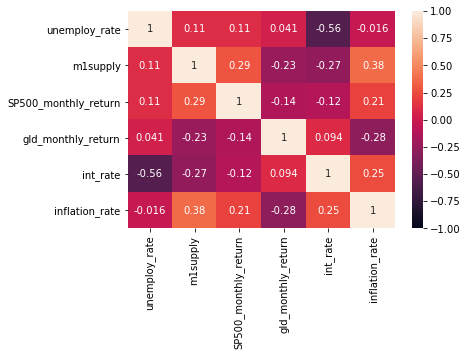

In [19]:
# With the seaborn packages, we plotted the heat map for the correlation among the variables and SP500
import seaborn as sns
heat_map = sns.heatmap(correlation,vmin=-1, vmax=1, annot = True)

In [ ]:
#  The heat map results shown that money supply and the performance of S&P500 has positive correlation, so we will focus on the money supply indicator in our study

In [41]:
#positive_correlation = pd.concat([msupply,SP500_df], axis ="columns", join= "inner")
#positive_correlation.head()

In [42]:

#positive_correlation_updated= positive_correlation.reset_index()
#positive_correlation_updated.columns = ["year", "money_supply","SP500"]
#positive_correlation_updated.head()

In [22]:
# Further datacleaning in money_supply dataframe and to plot the money supply with ploty express package
msupply_updated= msupply.reset_index()
msupply_updated.columns = ["year", "money_supply"]
msupply_updated.head()

year  money_supply
0 1997-01-06        1126.8
1 1997-01-13        1096.0
2 1997-01-20        1081.9
3 1997-01-27        1064.1
4 1997-02-03        1076.0

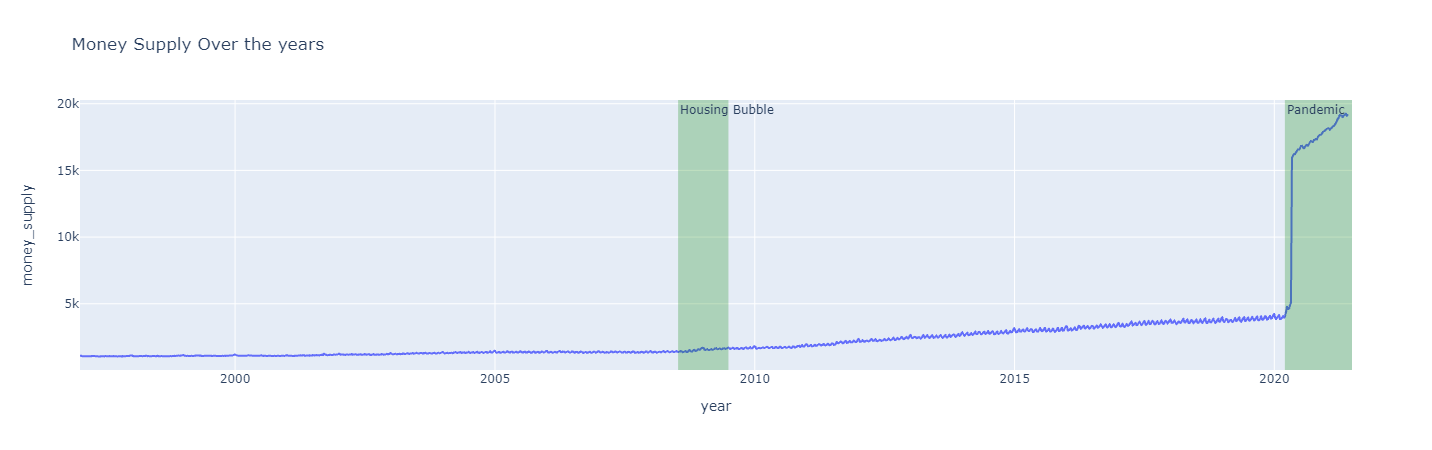

In [38]:
# Using plotly express to plot the money supply over the last 25 years and highlightling periods when there were financial crisis in the past.  These periods include 2008's housing bubble
# 2020's pandemic

msupply_plotly = px.line(msupply_updated, x= "year", y="money_supply", title = "Money Supply Over the years")
msupply_plotly = msupply_plotly.add_vrect(x0="2008-07-11", x1="2009-06-30",
               col=1,
              annotation_text="Housing Bubble", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
msupply_plotly2 = msupply_plotly.add_vrect( x0="2020-03-15", x1="2021-06-30",
               col=1,
              annotation_text="Pandemic", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
msupply_plotly2

In [ ]:
# Further data cleaning of S&P 500 index's dataframe to plot the performance of the S&P 500 in the past 25 years

In [26]:
SP500_df = SP500_df.reset_index()
SP500_df.columns = ["Year","SP500"]
SP500_df.head()

Year       SP500
0 1996-08-01  651.989990
1 1996-09-01  687.330017
2 1996-10-01  705.270020
3 1996-11-01  757.020020
4 1996-12-01  740.739990

In [ ]:
# Using plotly express to plot the performance of S&P 500 index over the last 25 years and highlighting the periods of  2008's housing bubble
# 2020's pandemic

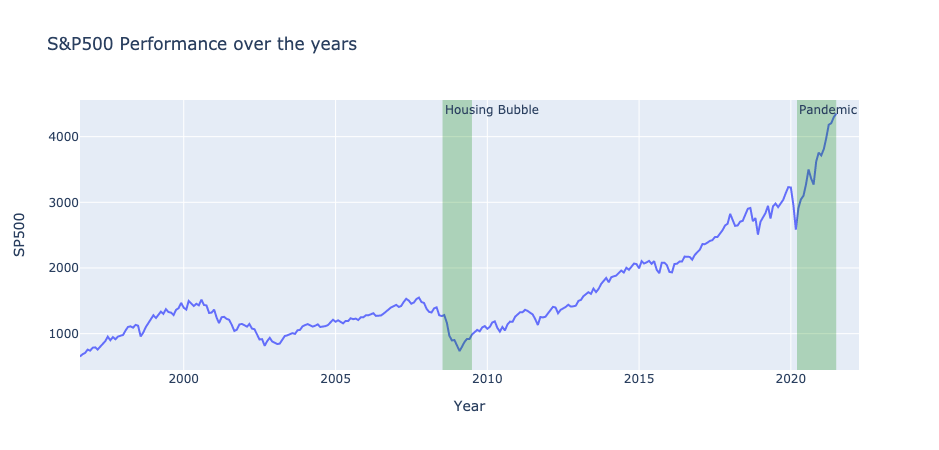

In [28]:
SP500_plot = px.line (SP500_df, x= "Year", y="SP500", title="S&P500 Performance over the years",)


SP500_plotly = SP500_plot.add_vrect( x0="2008-07-11", x1="2009-06-30",
               col=1,
              annotation_text="Housing Bubble", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
SP500_plotly2 = SP500_plotly.add_vrect( x0="2020-03-15", x1="2021-06-30",
               col=1,
              annotation_text="Pandemic", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
SP500_plotly2


In [ ]:
# To further study the performance of SP500 index over the last 25 years, we find more data about the S&P500 comparing to US GDP.  We then plot these data to see any particular pattern
# can be observed

#  SP500 to GDP ratio was retrieve using the CSV reader and the Date was set as the index column, and we will selet the data over the last 100 years for plotting
#  Green color rectangular box in the graph is used to highlight the periods of Great Depresson, 2000's Dotcom bubble, and the 2020's pandemic

In [ ]:
SP500_GDP_path = Path("sp500_gdp_ratio.csv")
SP500_GDP = pd.read_csv(SP500_GDP_path, infer_datetime_format=True, parse_dates = True)
 
SP500_GDP = SP500_GDP.dropna() 
SP500_GDP.set_index("DateTime", inplace=True)

SP500_GDP = SP500_GDP['1920-01-01' :'2021-06-30']

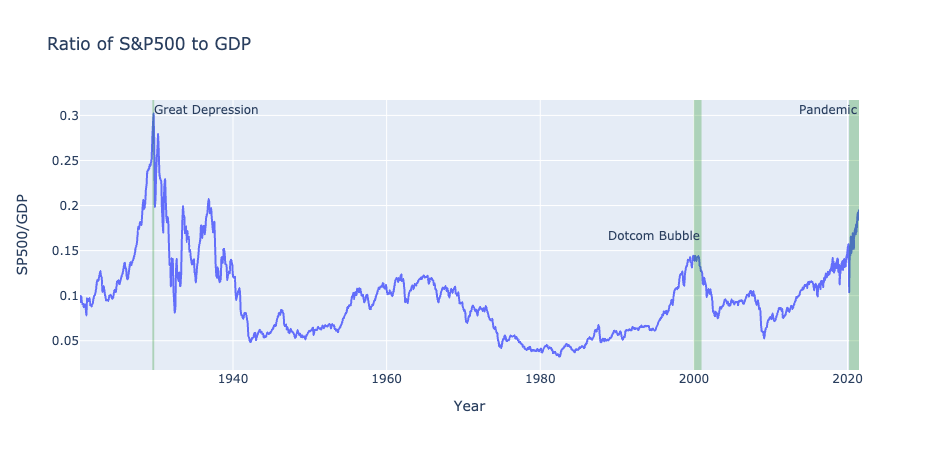

In [29]:
SP500_GDP_plot = px.line(SP500_GDP, x = SP500_GDP.index, y = "SP500/GDP", labels=dict(DateTime="Year"), title ="Ratio of S&P500 to GDP")



SP500_GDP_plot = SP500_GDP_plot.add_vrect( x0="1929-07-1", x1="1929-09-30",
                  col=1,
                  annotation_text="Great Depression", annotation_position="top left",
                  fillcolor="green", opacity=0.25, line_width=0)

SP500_GDP_plot2 = SP500_GDP_plot.add_vrect( x0="1999-12-27", x1="2000-12-30",
                  col=1,
                  annotation_text="Dotcom Bubble", annotation_position="right",
                  fillcolor="green", opacity=0.25, line_width=0)

SP500_GDP_plot3 = SP500_GDP_plot2.add_vrect( x0="2020-03-15", x1="2021-06-30",
                  col=1,
                  annotation_text="Pandemic", annotation_position="top right",
                  fillcolor="green", opacity=0.25, line_width=0)


SP500_GDP_plot3

In [ ]:
#  SP500  and GDP data were retrieved using the CSV reader and the Date was set as the index column, and we will selet the data over the last 60 years for plotting to see any signifiance changes
#  Green color rectangular box in the graph is used to highlight the periods of Great Depresson, 2000's Dotcom bubble, and the 2020's pandemic

In [30]:
SPGDP_path = Path("sp500_gdp.csv")
SP_GDP = pd.read_csv(SPGDP_path, infer_datetime_format=True, parse_dates = True)

SP_GDP.set_index("DateTime", inplace=True)




SP_GDP_50 = SP_GDP['1940-01-01' :'2021-06-30']

SP_GDP_50_return = SP_GDP_50.pct_change().dropna()

SP_GDP_50_return.head()

SP_GDP_50_cumulative = ((1+SP_GDP_50_return).cumprod())-1
SP_GDP_50_cumulative.head()

S&P 500  GDP
DateTime                          
1941-01-31 00:00:00 -0.062559  0.0
1941-02-28 00:00:00 -0.056872  0.0
1941-03-31 00:00:00 -0.086256  0.0
1941-04-30 00:00:00 -0.106161  0.0
1941-05-31 00:00:00 -0.074882  0.0

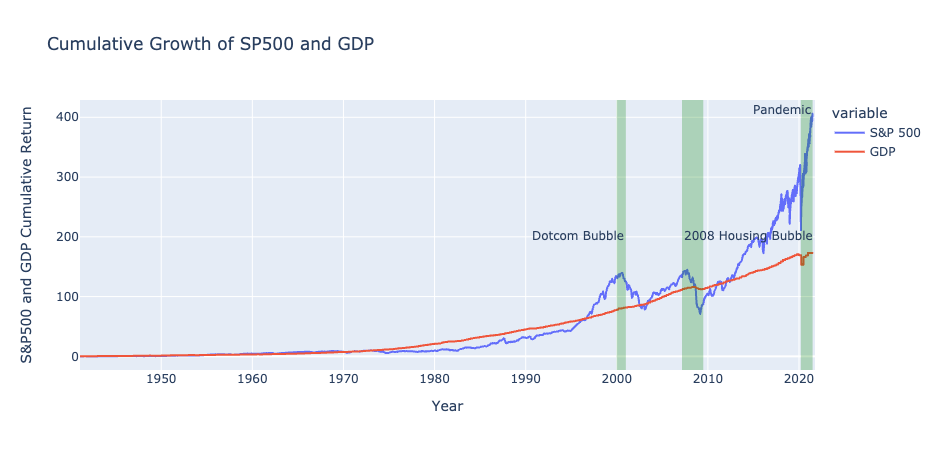

In [31]:
SP_GDP_50_plot = px.line(SP_GDP_50_cumulative, x = SP_GDP_50_cumulative.index, y = ["S&P 500","GDP"], labels=dict(DateTime="Year", value = "S&P500 and GDP Cumulative Return"), 
                        title = "Cumulative Growth of SP500 and GDP")



SP_GDP_50_plot = SP_GDP_50_plot.add_vrect( x0="1999-12-27", x1="2000-12-30",
                  col=1,
                  annotation_text="Dotcom Bubble", annotation_position="right",
                  fillcolor="green", opacity=0.25, line_width=0)

SP_GDP_50_plot2 = SP_GDP_50_plot.add_vrect( x0="2007-02-28", x1="2009-06-30",
                  col=1,
                  annotation_text="2008 Housing Bubble", annotation_position="left",
                  fillcolor="green", opacity=0.25, line_width=0)

SP_GDP_50_plot3 = SP_GDP_50_plot2.add_vrect( x0="2020-03-15", x1="2021-06-30",
                  col=1,
                  annotation_text="Pandemic", annotation_position="top right",
                  fillcolor="green", opacity=0.25, line_width=0)


SP_GDP_50_plot3

In [45]:
# Create a Title for the Dashboard
dashboard_title ="#Are the stock market in bubble?"

# Define an introductory text
dashboard_introduce ="The dashboard presents our findings of whether the stock markets are currently in bubble"

# Combine the two plots with GDP and SP500 in a row for better comparison and illustration
SP500_GDP = pn.Row (SP_GDP_50_plot3, SP500_GDP_plot3)

#  Establish the first tab as "Home" tab with the title and welcome and combine with the plots related to SP500 performance, money supply, and GDP data
dashboard_page = pn.Column (dashboard_title, dashboard_introduce, SP500_plotly2, msupply_plotly2, SP500_GDP)


# Create the main dashboard with each tabs being defined above
dashboard_tabs = pn.Tabs(             
                ("Economicial Measure", dashboard_page)
                #("Price to Earning", ),
                #("Sentimental Measure", )
                        )

In [46]:
dashboard_tabs

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
        [4] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)